Now, let's build the model

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm

In [4]:
train = pd.read_csv("WoeData.csv")
test = pd.read_csv("TestWoeData.csv",)

In [5]:
X=train.drop(['SeriousDlqin2yrs', 'DebtRatio','MonthlyIncome',
                'NumberOfOpenCreditLinesAndLoans',
                'NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
y = train.iloc[:, -1]

In [6]:
test=test.drop(['SeriousDlqin2yrs', 'DebtRatio','MonthlyIncome',
                'NumberOfOpenCreditLinesAndLoans',
                'NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
model = LogisticRegressionCV(random_state=0, cv=15)
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=15, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [9]:
pred = model.predict_proba(X_test)[:, 1]

In [10]:
fpr, tpr, threshold = roc_curve(y_test, pred)
rocauc = auc(fpr, tpr)
rocauc

0.8510436474414372

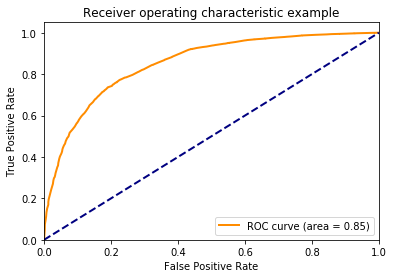

In [11]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [12]:
pred_test = model.predict_proba(test)[:, 1]

We can also use lgb to build model. And compare thest two results.

In [14]:
import lightgbm as lgb
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

/Users/pinecone/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [15]:
lgb_sk = lgb.LGBMClassifier(random_state=0).fit(X_train, y_train)

In [16]:
preddd = lgb_sk.predict_proba(X_test)[:, 1]

In [17]:
fpr, tpr, threshold = roc_curve(y_test, preddd)
rocauc = auc(fpr, tpr)
rocauc

0.8512560865839847

In [18]:
lgb_train = lgb.Dataset(X_train,y_train)
lgb_test = lgb.Dataset(X_test,y_test,reference=lgb_train)
lgb_origi_params = {'boosting_type':'gbdt',
              'max_depth':-1,
              'num_leaves':31,
              'bagging_fraction':1.0,
              'feature_fraction':1.0,
              'learning_rate':0.1,
              'metric': 'auc'}
lgb_origi = lgb.train(train_set=lgb_train,
                      early_stopping_rounds=10,
                      num_boost_round=400,
                      params=lgb_origi_params,
                      valid_sets=lgb_test)

[1]	valid_0's auc: 0.845951
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.845946
[3]	valid_0's auc: 0.846078
[4]	valid_0's auc: 0.846611
[5]	valid_0's auc: 0.850268
[6]	valid_0's auc: 0.850285
[7]	valid_0's auc: 0.850383
[8]	valid_0's auc: 0.850448
[9]	valid_0's auc: 0.850472
[10]	valid_0's auc: 0.850492
[11]	valid_0's auc: 0.850484
[12]	valid_0's auc: 0.850557
[13]	valid_0's auc: 0.850577
[14]	valid_0's auc: 0.851101
[15]	valid_0's auc: 0.851426
[16]	valid_0's auc: 0.851485
[17]	valid_0's auc: 0.85151
[18]	valid_0's auc: 0.851517
[19]	valid_0's auc: 0.851581
[20]	valid_0's auc: 0.851589
[21]	valid_0's auc: 0.851582
[22]	valid_0's auc: 0.851592
[23]	valid_0's auc: 0.851625
[24]	valid_0's auc: 0.851562
[25]	valid_0's auc: 0.851611
[26]	valid_0's auc: 0.851606
[27]	valid_0's auc: 0.851749
[28]	valid_0's auc: 0.851742
[29]	valid_0's auc: 0.851743
[30]	valid_0's auc: 0.851715
[31]	valid_0's auc: 0.851734
[32]	valid_0's auc: 0.851699
[33]	valid_0's auc: 

We can see that the results are very close.